# Named Entity Recognition NLTK

Named Entity Recognition is a process where an algorithm takes a string of text (sentence or paragraph) as input and identifies relevant nouns (people, places, and organizations) that are mentioned in that string.

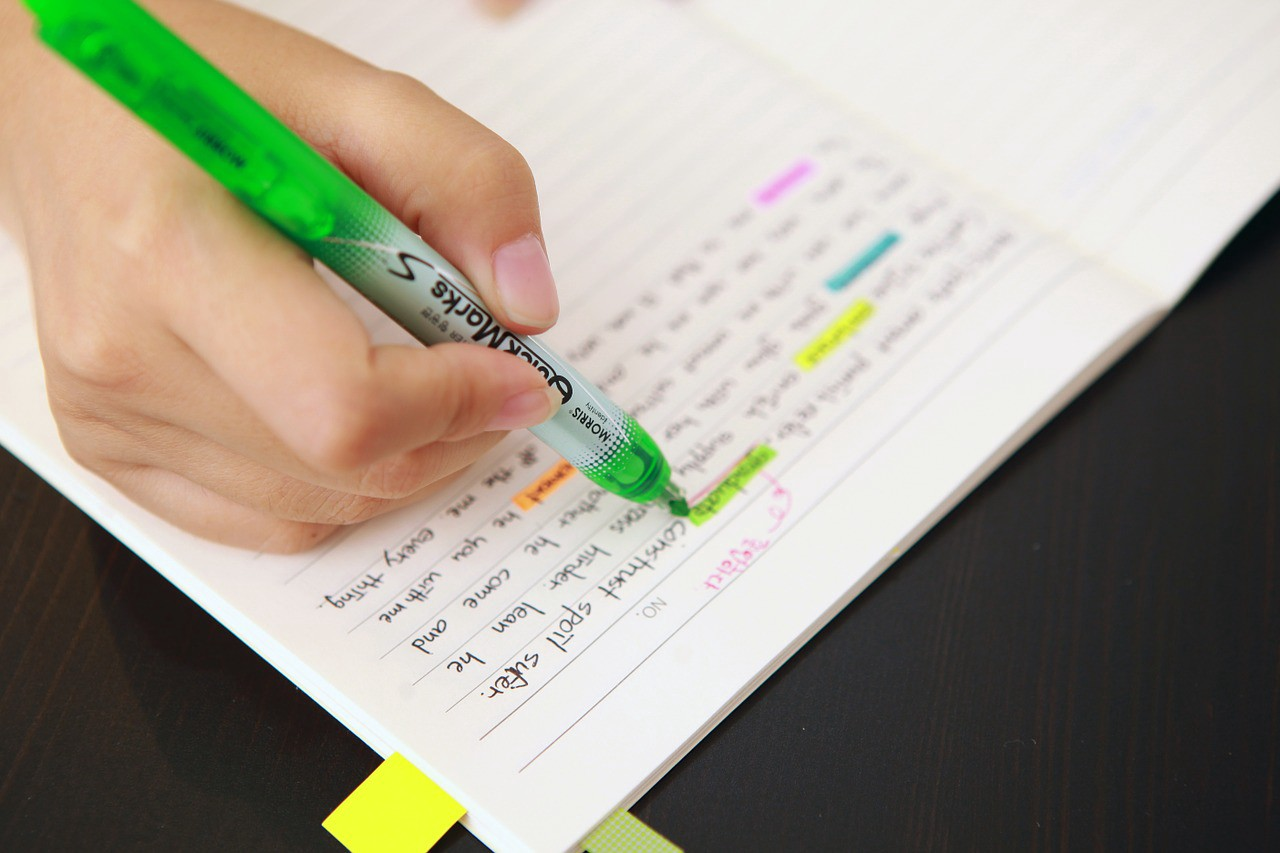

In [35]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

In [37]:
ex = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'

In [40]:
#apply word tokenization and part-of-speech tagging to the sentence.
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [41]:
sent = preprocess(ex)
sent

[('European', 'JJ'),
 ('authorities', 'NNS'),
 ('fined', 'VBD'),
 ('Google', 'NNP'),
 ('a', 'DT'),
 ('record', 'NN'),
 ('$', '$'),
 ('5.1', 'CD'),
 ('billion', 'CD'),
 ('on', 'IN'),
 ('Wednesday', 'NNP'),
 ('for', 'IN'),
 ('abusing', 'VBG'),
 ('its', 'PRP$'),
 ('power', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('market', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('the', 'DT'),
 ('company', 'NN'),
 ('to', 'TO'),
 ('alter', 'VB'),
 ('its', 'PRP$'),
 ('practices', 'NNS')]

### Chunking

Chunk pattern consists of one rule, that a noun phrase, NP, should be formed whenever the chunker finds an optional determiner, DT, followed by any number of adjectives, JJ, and then a noun, NN.

In [42]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'

In [43]:
#create a chunk parser and test it on our sentence.
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)

(S
  European/JJ
  authorities/NNS
  fined/VBD
  Google/NNP
  (NP a/DT record/NN)
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  (NP power/NN)
  in/IN
  (NP the/DT mobile/JJ phone/NN)
  (NP market/NN)
  and/CC
  ordered/VBD
  (NP the/DT company/NN)
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


In [12]:
NPChunker = nltk.RegexpParser(pattern) 
result = NPChunker.parse(sent)
result.draw()

The output can be read as a tree or a hierarchy with S as the first level, denoting sentence. we can also display it graphically.


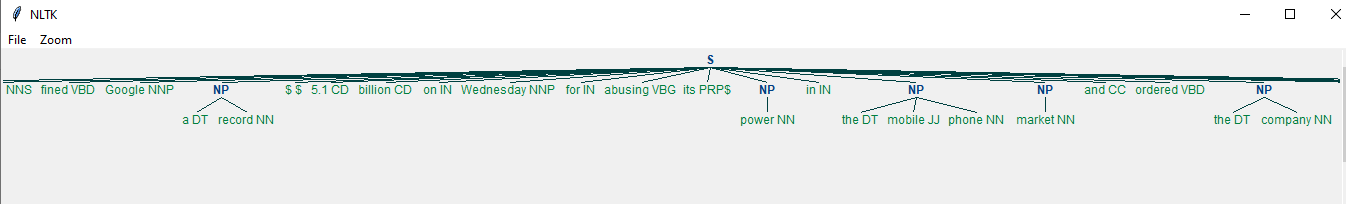

### Spacy 


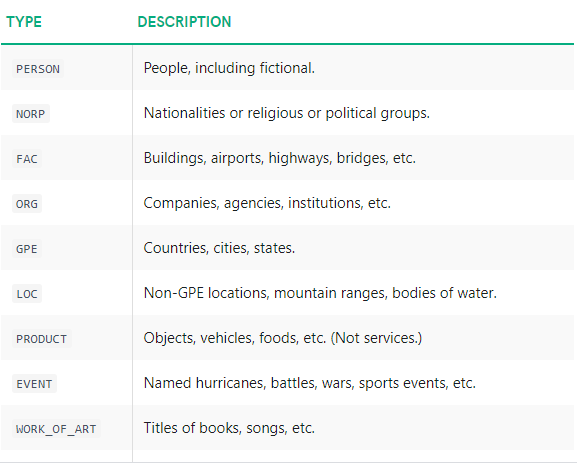

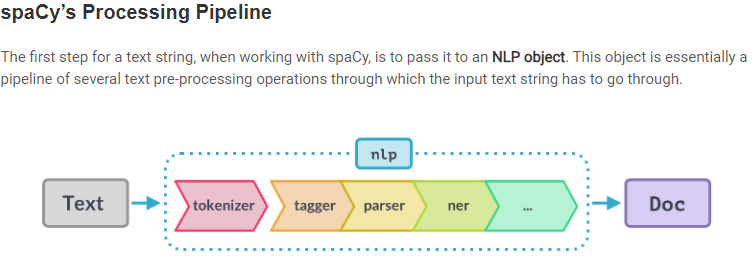

In [44]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

One of the nice things about Spacy is that we only need to apply nlp once, the entire background pipeline will return the objects.

In [45]:
doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
pprint([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'),
 ('Google', 'ORG'),
 ('$5.1 billion', 'MONEY'),
 ('Wednesday', 'DATE')]


In [46]:
pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])

[(European, 'B', 'NORP'),
 (authorities, 'O', ''),
 (fined, 'O', ''),
 (Google, 'B', 'ORG'),
 (a, 'O', ''),
 (record, 'O', ''),
 ($, 'B', 'MONEY'),
 (5.1, 'I', 'MONEY'),
 (billion, 'I', 'MONEY'),
 (on, 'O', ''),
 (Wednesday, 'B', 'DATE'),
 (for, 'O', ''),
 (abusing, 'O', ''),
 (its, 'O', ''),
 (power, 'O', ''),
 (in, 'O', ''),
 (the, 'O', ''),
 (mobile, 'O', ''),
 (phone, 'O', ''),
 (market, 'O', ''),
 (and, 'O', ''),
 (ordered, 'O', ''),
 (the, 'O', ''),
 (company, 'O', ''),
 (to, 'O', ''),
 (alter, 'O', ''),
 (its, 'O', ''),
 (practices, 'O', '')]


In [47]:
from bs4 import BeautifulSoup
import requests
import re

In [48]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))

In [49]:
ny_bb = url_to_string('https://www.nytimes.com/2018/08/13/us/politics/peter-strzok-fired-fbi.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=first-column-region&region=top-news&WT.nav=top-news')
article = nlp(ny_bb)
print(article.ents)
len(article.ents)

(F.B.I., Peter Strzok, Texts, The New York Times, Peter Strzok, Texts, Peter Strzok, Texts, FiredPeter Strzok, F.B.I., Trump, The New York TimesBy Adam, Michael S. SchmidtAug, 13, 2018WASHINGTON, Peter Strzok, F.B.I., Trump, Hillary Clinton, Russia, Strzok, Monday, Trump, 2016, F.B.I., Lisa Page, Russia, Strzok, 20 years, F.B.I., the early months, Strzok, F.B.I., Trump, Strzok, last summer, Robert S. Mueller III, Strzok, Monday, Trump, June, Strzok, F.B.I., Hillary Clinton, 2016, Strzok, Office of Professional Responsibility, Strzok, 60 days, Strzok, House, July, Strzok, F.B.I., David Bowdich, the Office of Professional Responsibility, Strzok, F.B.I., Strzok, Strzok, Trump, F.B.I., Bowdich, F.B.I., Christopher A. Wray, Aitan Goelman, Strzok, Wray, Congress, F.B.I., Goelman, Americans, Goelman, Page, Trump, one, Page, Trump, Strzok, Michael E. Horowitz, Strzok, Strzok, Clinton, just weeks, 2016, Horowitz, Hundreds, over months, Trump, Clinton, Strzok, Trump, Trump, Strzok, Strzok, Strzo

153

There are 153 entities in the article and they are represented as 8 unique labels:

In [50]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'ORG': 38,
         'PERSON': 76,
         'DATE': 23,
         'GPE': 9,
         'NORP': 2,
         'CARDINAL': 3,
         'LOC': 1,
         'ORDINAL': 1})

In [51]:
#most common used items

items = [x.text for x in article.ents]
Counter(items).most_common(3)

[('Strzok', 29), ('F.B.I.', 19), ('Trump', 13)]

In [52]:
sentences = [x for x in article.sents]
print(sentences[20])

Firing Mr. Strzok, however, removes a favorite target of Mr. Trump from the ranks of the F.B.I. and gives Mr. Bowdich and the F.B.I. director, Christopher A. Wray, a chance to move beyond the president’s ire.


In [29]:
#Displaying detecing the name entities, Marking down.

displacy.render(nlp(str(sentences[20])), jupyter=True, style='ent')